<a href="https://colab.research.google.com/github/zeynepyilmazz/DataScienceBootcamp/blob/main/05.IntroductiontoStatistics/03.Statistical_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**(1)** By using distribution=np.random.name_distribution([],[]), write the name of distribution of your choice in place of `name_distribution`and fill out the bracket with your choice again. Then please, 

**(a)** Draw the histogram and interpret

normal_data  mean : 9.733156452456889
normal_data  median : 9.62094513918877


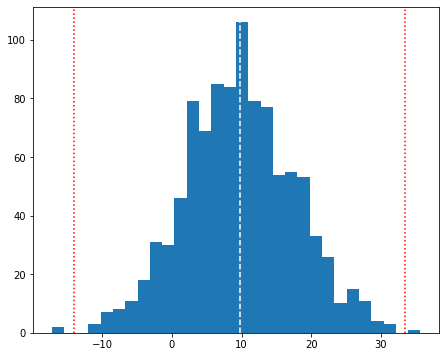

In [ ]:
normal_data = np.random.normal(10,8,1000)
print('normal_data  mean : {}'.format(np.mean(normal_data )))
print('normal_data  median : {}'.format(np.median(normal_data )))
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
plt.hist(normal_data , bins = 30)
plt.axvline(np.mean(normal_data ) , linestyle = '--' , color = 'white')
plt.axvline(np.mean(normal_data ) + 3*np.std(normal_data) , linestyle = ':' , color = 'red')
plt.axvline(np.mean(normal_data ) - 3*np.std(normal_data) , linestyle = ':' , color = 'red')
plt.show()


Dağılım türü olarak normal dağılımı seçip ortalaması 10 standart sapması 8 olan 1000 sayıyı data değişkenine atadım. data değişkeninin histogramını çizdirdiğimde çan eğrisine benzer bir şekil elde ettim.Normal dağılımda ortalama ve medyan değerleri birbirine çok yakındır. Çıktı olarak ortalama ve medyan değerlerine baktığımda data değişkeni için birbirine çok yakın olduğunu söyleyebilirim. Ortalamadan 3 standart sapma sağa ve sola gidildikçe verinin %99.7'sini kapsarız.


**(b)** Draw Q-Q plot and interpret

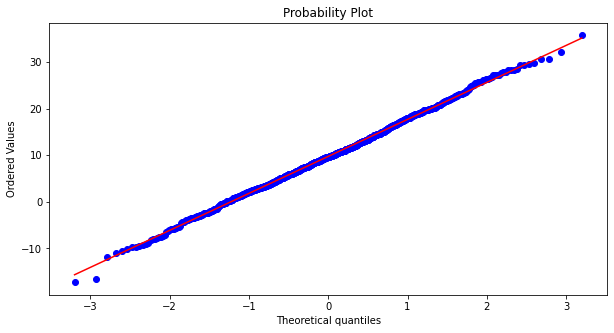

In [ ]:
from scipy import stats
plt.figure(figsize = (10,5))
res = stats.probplot(normal_data,plot=plt)
plt.show()

Grafiğe baktığımızda verimizin normal dağılıma sahip olduğunu söyleyebiliriz.

**(2)** Get the google stock quotes from 2015-2017 using https://finance.yahoo.com/. Using this data, calculate the stock return with the following formula:

$$P_t-P_{t-1}/P_{t-1}$$

where $P_t$ represents the stock price at time t and $P_{t-1}$ denotes the stock price at time t-1. What do you think about the return distribution? 

**Note:** Data is retrieved from https://finance.yahoo.com/ as follows. After clicking the given address, type the name of the stock you want to search in the search section (eg google). Click on the search result below to go to the relevant stock. When you get to the page with the relevant stock information, click the Historical Prices tab, select the relevant date range, then click Apply. Finally, click the Download Data button to download the data. Alternative you can use `yfinance` library

In [ ]:
df = pd.read_csv('GOOG.csv' , parse_dates=['Date'] , low_memory=False)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582
...,...,...,...,...,...,...,...
499,2016-12-23,790.900024,792.739990,787.280029,789.909973,789.909973,623400
500,2016-12-27,790.679993,797.859985,787.656982,791.549988,791.549988,789100
501,2016-12-28,793.700012,794.229980,783.200012,785.049988,785.049988,1153800
502,2016-12-29,783.330017,785.929993,778.919983,782.789978,782.789978,744300


In [ ]:
df['stock_return'] = pd.Series(dtype='float64')
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume,stock_return
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563,NaN
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840,NaN
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,NaN
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054,NaN
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582,NaN
...,...,...,...,...,...,...,...,...
499,2016-12-23,790.900024,792.739990,787.280029,789.909973,789.909973,623400,NaN
500,2016-12-27,790.679993,797.859985,787.656982,791.549988,791.549988,789100,NaN
501,2016-12-28,793.700012,794.229980,783.200012,785.049988,785.049988,1153800,NaN
502,2016-12-29,783.330017,785.929993,778.919983,782.789978,782.789978,744300,NaN


In [ ]:
for i in range(1,len(df)):
  df.iloc[i , df.columns.get_loc('stock_return')] = (df['Open'].iloc[i] - df['Close'].iloc[i-1]) / df['Close'].iloc[i-1]

mean               : 0.0010237320400707612
median             : 0.00035171142879731975
standard deviation : 0.011477902729399142


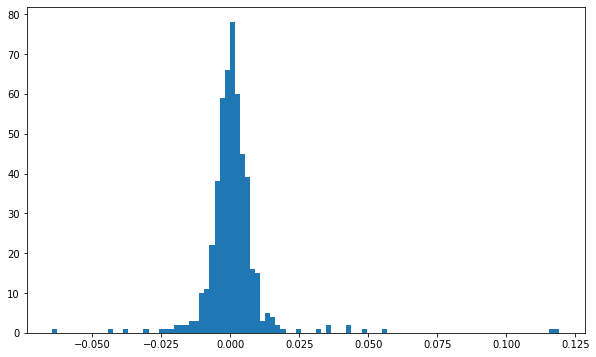

In [ ]:
print('mean               : {}'.format(df['stock_return'].mean()))
print('median             : {}'.format(df['stock_return'].median()))
print('standard deviation : {}'.format(df['stock_return'].std()))
plt.figure(figsize = (10,6))
plt.hist(df['stock_return'] , bins = 100)
plt.show()

Histograma baktığımızda verinin normal dağılmış olabileceğini düşünürüz. Ama histogram kesin bir sonuç vermez.

In [ ]:
percent = (df[(df['stock_return'] > df['stock_return'].mean() - 3*df['stock_return'].std()) & 
          (df['stock_return'] < df['stock_return'].mean() + 3*df['stock_return'].std())]['stock_return'].count() * 100) / len(df['stock_return'])

print('%{}'.format(percent))

%97.81746031746032


Normal dağılımda ortalamadan 3 standart sapma sağa ve sola gittiğimizde verilerin %99.99'unu kapsamış oluruz. Bu veride ortalamadan 3 standart sapma sağa ve sola gittiğimizde verinin %97.8'ini kapsadığını görüyoruz.

In [ ]:
normal = np.random.normal(df['stock_return'].mean() , df['stock_return'].std() , len(df['stock_return']))
normal.sort()


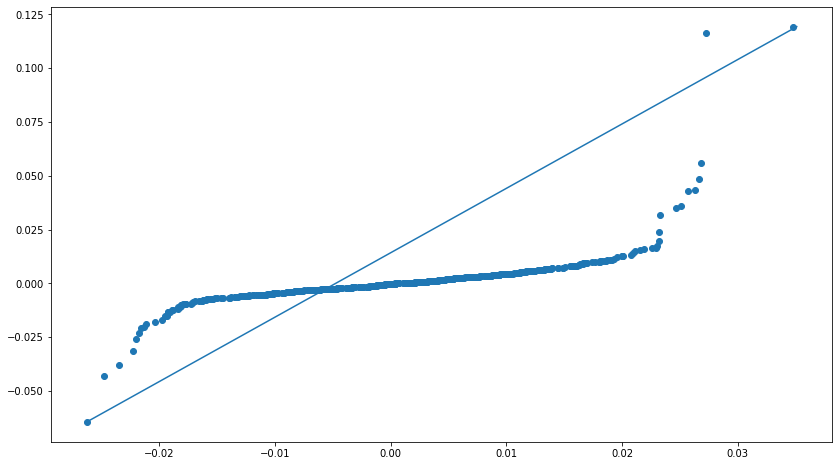

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(normal , df['stock_return'].sort_values())
plt.plot( [np.min(normal) , np.max(normal)] , [df['stock_return'].min() , df['stock_return'].max()])
plt.show()

Histograma baktığımızda verimizin normal dağılıma benzediğini söyleyebilirdik ama QQ plots çizdiğimizde görüyoruz ki verimiz normal dağılıma sahip değil.